In [7]:
# importing packages
import pandas as pd
import numpy as np
from scipy.interpolate import spline
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num
from mpl_toolkits.basemap import Basemap

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('klavern.csv')

In [18]:
dfstate = pd.read_csv('states.csv')

In [19]:
df.head()

,id,state_id,city,klan_number,nickname,notes,latitude,longitude,year
0,1,61,Birmingham,1,R. E. Lee Klan,may be the oldest functioning Klan in the Invi...,33.520661,-86.802490,1924
1,2,61,Bessemer,2,Niles Burnett Klan,No Notes,33.401777,-86.954437,1926
2,3,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1923
3,4,61,Anniston,4,Not Named,No Notes,33.659826,-85.831632,1924
4,5,61,Birmingham,6,Nathan Bedford Forrest Klan,No Notes,33.520661,-86.802490,1924


In [20]:
dfstate['state_id'] = dfstate['id'] 
dfstate.head()

,id,state,state_id
0,61,Alabama,61
1,62,Alaska,62
2,63,Arizona,63
3,64,California,64
4,65,Colorado,65


In [21]:
cols = list(dfstate.columns.values)
cols
dfstate = dfstate[['state_id', 'id', 'state']]
dfstate.head()

,state_id,id,state
0,61,61,Alabama
1,62,62,Alaska
2,63,63,Arizona
3,64,64,California
4,65,65,Colorado


In [22]:
df = pd.merge(df, dfstate, how='left', on=['state_id'])

In [23]:
df.head()

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
0,1,61,Birmingham,1,R. E. Lee Klan,may be the oldest functioning Klan in the Invi...,33.520661,-86.802490,1924,61,Alabama
1,2,61,Bessemer,2,Niles Burnett Klan,No Notes,33.401777,-86.954437,1926,61,Alabama
2,3,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1923,61,Alabama
3,4,61,Anniston,4,Not Named,No Notes,33.659826,-85.831632,1924,61,Alabama
4,5,61,Birmingham,6,Nathan Bedford Forrest Klan,No Notes,33.520661,-86.802490,1924,61,Alabama


In [24]:
df = df[df['year']>1]

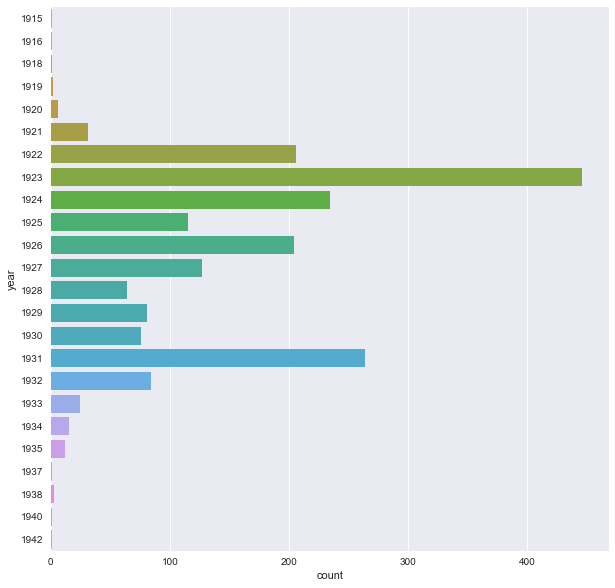

In [25]:
plt.figure(figsize = (10,10))
sns.countplot(y= 'year', data = df)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



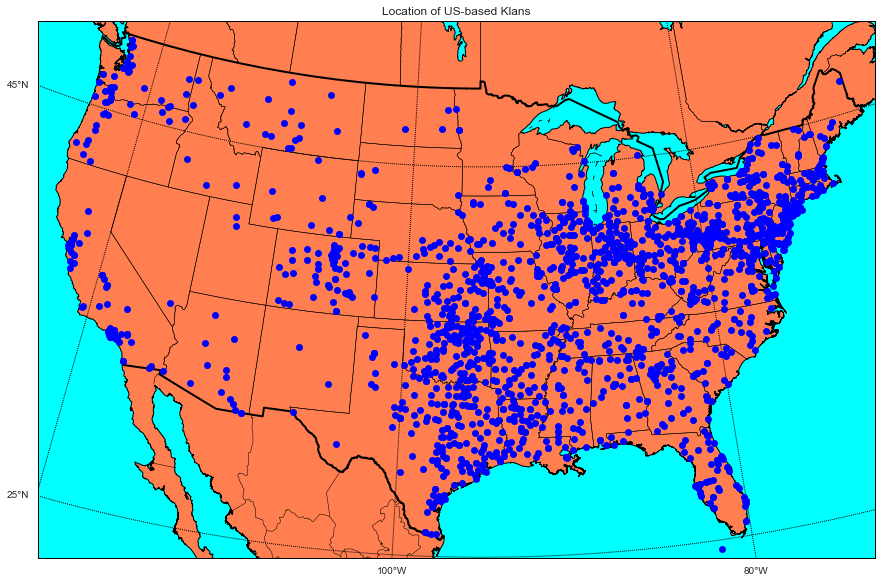

In [16]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = df['longitude']
lat = df['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('Location of US-based Klans')
plt.show()

In [26]:
dff = df.pivot_table(values = 'id_x', index = ['city', 'state'],
               aggfunc=lambda x: len(x.unique()), fill_value=0)
dff

id_x
city             state               
Aberdeen         Mississippi        1
Abilene          Kansas             1
                 Texas              1
Ada              Oklahoma           1
Adrian           Michigan           1
Agency           Missouri           1
Aiken            South Carolina     2
Ajo              Arizona            1
Akron            Alabama            1
                 Colorado           1
                 Ohio               1
Alameda          California         2
Albany           Nebraska           1
                 New York           1
Albert Lea       Minnesota          2
Albuquerque      New Mexico         1
Alena            Michigan           1
Alexandria       Louisiana          2
                 Virginia           1
Algiers          Louisiana          1
Alhambra         California         2
Alice            Texas              1
Allegan          Michigan           1
Allegheny        Pennsylvania       1
Allegheny County Pennsylvania       1
Allen            Oklahoma           1
                 Pennsylvania       1
Allendale        South Carolina     1
Allentown        Pennsylvania       1
Alliance         Ohio               1
...                               ...
Winters          Texas              4
Wolfe City       Texas              1
Wood River       Nebraska           1
Woodland         Washington         1
Woodlawn         Pennsylvania       1
Woodmere         Michigan           1
Woodstock        Georgia            1
Worcester        Massachusetts      1
Wrangell         Alaska             1
Wray             Colorado           1
Wrightsville     Pennsylvania       1
Wyandotte        Michigan           2
Wyandotte County Ohio               1
Wynne            Arkansas           1
Wynona           Oklahoma           1
Wyoming          Pennsylvania       1
Yakima           Washington         1
Yale             Oklahoma           1
Yampa            Colorado           1
Yell County      Arkansas           1
Yoakum           Texas              1
Yonkers          New York           1
York             Maine              1
                 Pennsylvania       1
York County      Nebraska           1
                 Pennsylvania       1
Youngblood       Pennsylvania       1
Youngstown       Ohio               1
Yuma             Arizona            1
Zanesville       Ohio               1

[1699 rows x 1 columns]

In [ ]:
 #dff['state']

In [27]:
dff[dff['id_x']==dff['id_x'].max()]

,,id_x
city,state,
Chicago,Illinois,28


In [29]:
dfstatep = df.pivot_table(values = 'id_x', index = ['state'],
               aggfunc=lambda x: len(x.unique()), fill_value=0)
dfstatep = dfstatep.sort_values(by = 'id_x', ascending = False)
dfstatep

,id_x
state,
Pennsylvania,187
Texas,163
New York,125
Illinois,107
Oklahoma,102
Ohio,94
California,80
Indiana,79
Missouri,74


In [31]:
dfstatep = dfstatep.reset_index().rename_axis(None, axis=1)
dfstatep.head()

,index,state,id_x
0,0,Pennsylvania,187
1,1,Texas,163
2,2,New York,125
3,3,Illinois,107
4,4,Oklahoma,102


In [33]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [35]:
##Dict to dataframe
s = pd.Series(us_state_abbrev, name='abbrev')
s.index.name = 'state'
s.reset_index()
s.head(5)
pd.DataFrame(s)
s = s.reset_index().rename_axis(None, axis=1)
s.head()

,state,abbrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [38]:
dfstatep = pd.merge(dfstatep, s, how='left', on=['state'])
dfstatep.head()

,index,state,id_x,abbrev
0,0,Pennsylvania,187,PA
1,1,Texas,163,TX
2,2,New York,125,NY
3,3,Illinois,107,IL
4,4,Oklahoma,102,OK


In [39]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [40]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = dfstatep['abbrev'],
            z = dfstatep['id_x'],
            locationmode = 'USA-states',
            text = dfstatep['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"id_x"}
            ) 

In [41]:
layout = dict(title = '# of Klans',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [48]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'file:///Users/andrewmurphy/Documents/KAGGLE/temp-plot.html'

In [43]:
df.head()

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
0,1,61,Birmingham,1,R. E. Lee Klan,may be the oldest functioning Klan in the Invi...,33.520661,-86.802490,1924,61,Alabama
1,2,61,Bessemer,2,Niles Burnett Klan,No Notes,33.401777,-86.954437,1926,61,Alabama
2,3,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1923,61,Alabama
3,4,61,Anniston,4,Not Named,No Notes,33.659826,-85.831632,1924,61,Alabama
4,5,61,Birmingham,6,Nathan Bedford Forrest Klan,No Notes,33.520661,-86.802490,1924,61,Alabama


In [44]:
firstklans = df.sort_values(by = 'year').head(5)
firstklans

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
1994,2065,70,Atlanta,1,Not Named,No Notes,33.748995,-84.387982,1915,70,Georgia
1990,2061,61,Birmingham,1,Not Named,No Notes,33.520661,-86.802490,1916,61,Alabama
1991,2062,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1918,61,Alabama
1992,2063,61,Anniston,4,Not Named,No Notes,33.659826,-85.831632,1919,61,Alabama
1995,2066,70,Columbus,29,Not Named,No Notes,32.460976,-84.987709,1919,70,Georgia


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



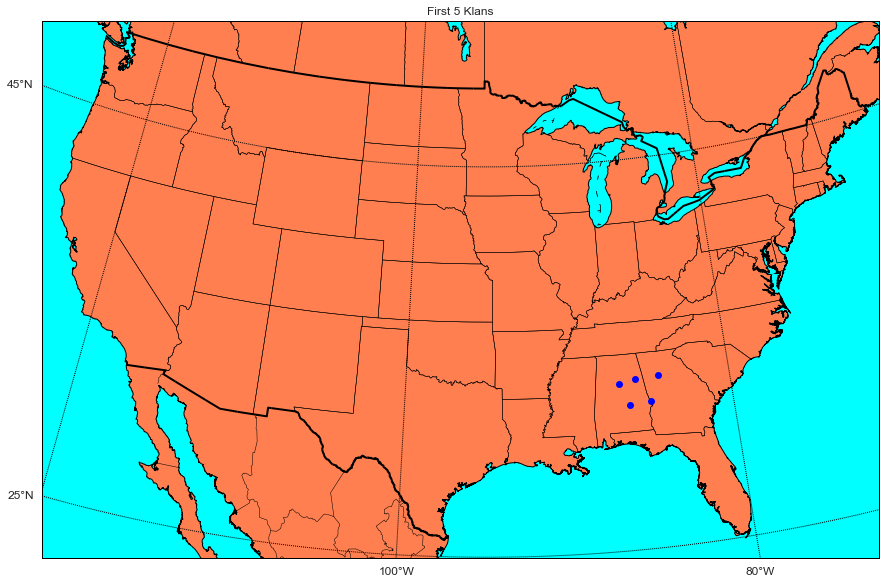

In [461]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = firstklans['longitude']
lat = firstklans['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('First 5 Klans')
plt.show()

In [416]:
OG = df[df['year']<1923]
OG

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
57,84,110,Bentonville,1,Not Named,No Notes,36.372854,-94.208817,1922,110,Arkansas
58,85,110,Mena,1,Not Named,"See No. 90,received charter",34.586217,-94.239655,1922,110,Arkansas
62,89,110,Benton,4,Not Named,No Notes,34.564537,-92.586828,1922,110,Arkansas
64,91,110,Hot Springs,7,Not Named,No Notes,34.503700,-93.055180,1922,110,Arkansas
65,92,110,Hope,8,Hempstead County Klan,No Notes,33.667061,-93.591566,1922,110,Arkansas
66,93,110,Prescott,9,Not Named,No Notes,33.802611,-93.381006,1922,110,Arkansas
69,96,110,Newport,12,Stephens Klan,No Notes,35.604802,-91.281795,1922,110,Arkansas
70,97,110,Fort Smith,15,Not Named,No Notes,35.385924,-94.398547,1922,110,Arkansas
73,100,110,Batesville,30,Not Named,No Notes,35.769799,-91.640972,1922,110,Arkansas
74,101,110,Newark,31,Big Bottom Klan,No Notes,35.701744,-91.441522,1922,110,Arkansas


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



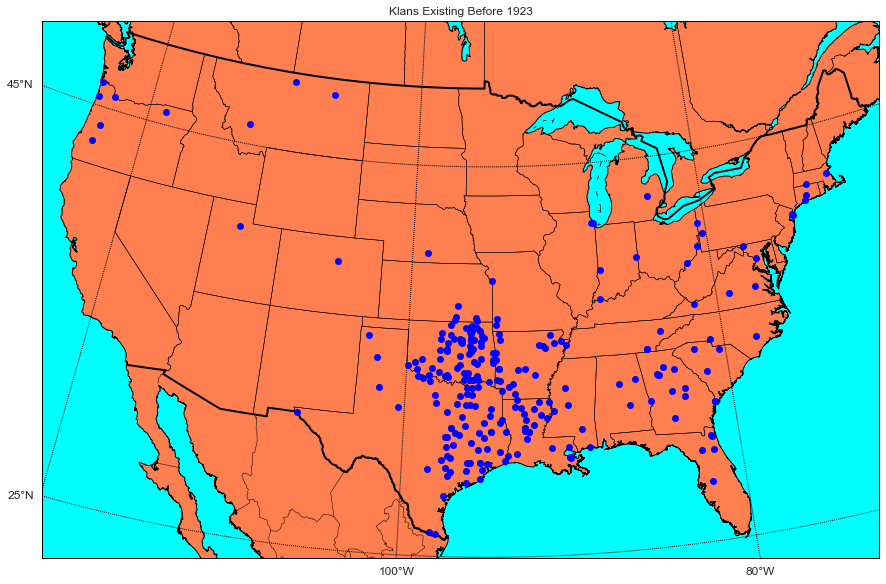

In [464]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = OG['longitude']
lat = OG['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('Klans Existing Before 1923')
plt.show()

In [45]:
NEW = df[df['year']==1923]
NEW

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
2,3,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1923,61,Alabama
7,8,61,Stevenson,12,Not Named,No Notes,34.868693,-85.839420,1923,61,Alabama
8,9,61,Tuscaloosa,14,Jack Jolly Klan,No Notes,33.209841,-87.569174,1923,61,Alabama
11,12,61,Vincent,34,Not Named,No Notes,33.384554,-86.411924,1923,61,Alabama
13,14,61,Luverne,51,Not Named,No Notes,31.716546,-86.263849,1923,61,Alabama
14,15,61,Louisville,57,Not Named,No Notes,31.783496,-85.555775,1923,61,Alabama
15,16,61,Birmingham,59,Avondale Park Klan,No Notes,33.520661,-86.802490,1923,61,Alabama
16,17,61,Birmingham,60,Nathan Bedford Forrest Klan,"will break ground on $75,000 Klavern on 15 Oct...",33.520661,-86.802490,1923,61,Alabama
17,18,61,Sheffield,63,Stonewall Jackson Klan,No Notes,34.765089,-87.698641,1923,61,Alabama
18,19,61,Oneonta,66,Not Named,No Notes,33.948154,-86.472764,1923,61,Alabama


In [ ]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = NEW['longitude']
lat = NEW['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('Klans Originating in 1923')
plt.show()

In [420]:
NEWAGAIN = df[df['year']==1931]
NEWAGAIN

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
5,6,61,Huntsville,9,Not Named,No Notes,34.730369,-86.586104,1931,61,Alabama
6,7,61,Mobile,11,Not Named,No Notes,30.695366,-88.039891,1931,61,Alabama
27,28,61,Collinsville,125,Not Named,No Notes,34.263982,-85.860525,1931,61,Alabama
36,37,62,Cordova,4,Not Named,No Notes,60.542409,-145.752541,1931,62,Alaska
37,38,62,Petersburg,5,Not Named,No Notes,56.812500,-132.955556,1931,62,Alaska
38,39,62,Fairbanks,6,Not Named,No Notes,64.837778,-147.716389,1931,62,Alaska
39,40,62,Seward,8,Not Named,No Notes,60.104167,-149.442222,1931,62,Alaska
40,41,62,Skagway,9,Not Named,No Notes,59.458333,-135.313889,1931,62,Alaska
41,42,62,Wrangell,10,Not Named,No Notes,56.470833,-132.376667,1931,62,Alaska
42,43,62,Haines,11,Not Named,No Notes,59.235833,-135.445000,1931,62,Alaska


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



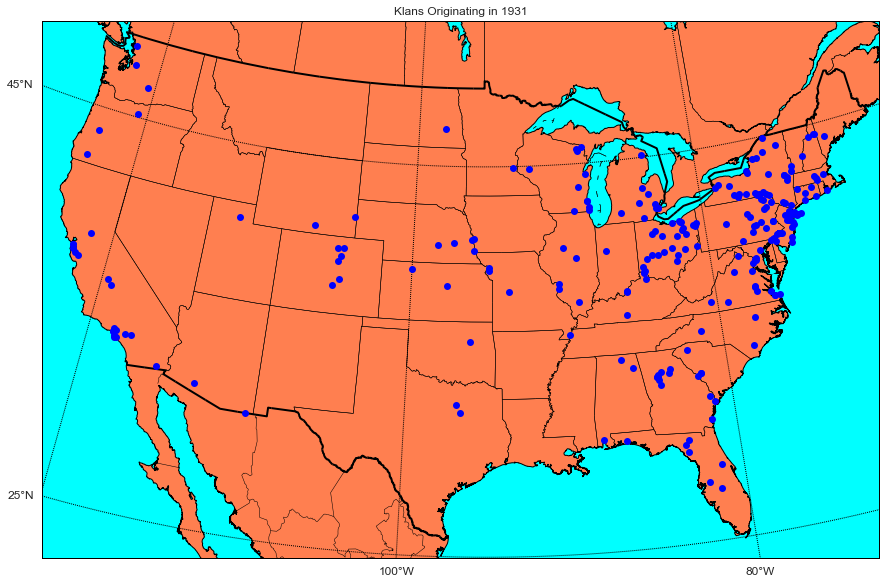

In [465]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = NEWAGAIN['longitude']
lat = NEWAGAIN['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('Klans Originating in 1931')
plt.show()

In [46]:
dff = dff.sort_values(by = 'id_x', ascending = False)
top_pop_cities = dff.head(10)
top_pop_cities

,,id_x
city,state,
Chicago,Illinois,28
Philadelphia,Pennsylvania,18
Kansas City,Missouri,7
Oakland,California,6
Washington,DC,5
Chattanooga,Tennessee,5
Cincinnati,Ohio,5
San Francisco,California,5
Birmingham,Alabama,5


In [47]:
top_pop_cities = top_pop_cities.reset_index().rename_axis(None, axis=1)
top_pop_cities

,city,state,id_x
0,Chicago,Illinois,28
1,Philadelphia,Pennsylvania,18
2,Kansas City,Missouri,7
3,Oakland,California,6
4,Washington,DC,5
5,Chattanooga,Tennessee,5
6,Cincinnati,Ohio,5
7,San Francisco,California,5
8,Birmingham,Alabama,5
9,Pittsburgh,Pennsylvania,4


In [424]:
df.head()

,id_x,state_id,city,klan_number,nickname,notes,latitude,longitude,year,id_y,state
0,1,61,Birmingham,1,R. E. Lee Klan,may be the oldest functioning Klan in the Invi...,33.520661,-86.802490,1924,61,Alabama
1,2,61,Bessemer,2,Niles Burnett Klan,No Notes,33.401777,-86.954437,1926,61,Alabama
2,3,61,Montgomery,3,Not Named,No Notes,32.366805,-86.299969,1923,61,Alabama
3,4,61,Anniston,4,Not Named,No Notes,33.659826,-85.831632,1924,61,Alabama
4,5,61,Birmingham,6,Nathan Bedford Forrest Klan,No Notes,33.520661,-86.802490,1924,61,Alabama


In [445]:
dfinal = df.pivot_table(values = 'id_x', index = ['city', 'state', 'latitude', 'longitude'],
               aggfunc=lambda x: len(x.unique()), fill_value=0)
dfinal = dfinal.sort_values(by = 'id_x', ascending = False)
dfinal = dfinal.head(10)
dfinal

,,,,id_x
city,state,latitude,longitude,
Chicago,Illinois,41.878114,-87.629798,28
Philadelphia,Pennsylvania,39.952584,-75.165222,18
Kansas City,Missouri,39.099727,-94.578567,7
Oakland,California,37.804364,-122.271114,6
Chattanooga,Tennessee,35.045630,-85.309680,5
San Francisco,California,37.774929,-122.419415,5
Cincinnati,Ohio,39.103118,-84.512020,5
Birmingham,Alabama,33.520661,-86.802490,5
Washington,DC,38.907192,-77.036871,5


In [450]:
dfinal = dfinal.reset_index().rename_axis(None, axis=1)
dfinal

,level_0,index,city,state,latitude,longitude,id_x
0,0,0,Chicago,Illinois,41.878114,-87.629798,28
1,1,1,Philadelphia,Pennsylvania,39.952584,-75.165222,18
2,2,2,Kansas City,Missouri,39.099727,-94.578567,7
3,3,3,Oakland,California,37.804364,-122.271114,6
4,4,4,Chattanooga,Tennessee,35.045630,-85.309680,5
5,5,5,San Francisco,California,37.774929,-122.419415,5
6,6,6,Cincinnati,Ohio,39.103118,-84.512020,5
7,7,7,Birmingham,Alabama,33.520661,-86.802490,5
8,8,8,Washington,DC,38.907192,-77.036871,5
9,9,9,Los Angeles,California,34.052234,-118.243685,4


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



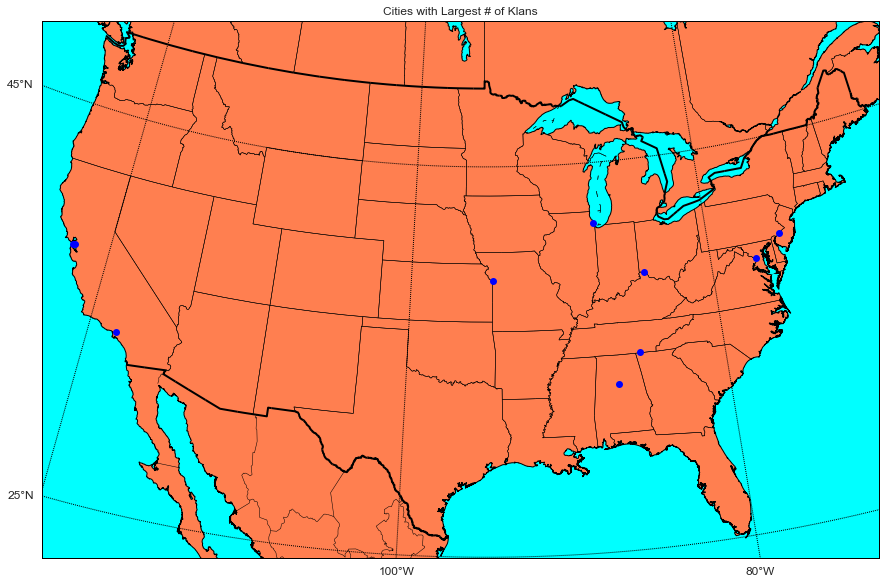

In [455]:
plt.figure(figsize = (15,15))
# pyplot module import
import matplotlib.pyplot as plt
# basemap import
from mpl_toolkits.basemap import Basemap
# Numpy import
import numpy as np
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# draw the coastlines of continental area
m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])

lon = dfinal['longitude']
lat = dfinal['latitude']
for i in range(len(lon)):
    x, y = m(lon.iloc[i],lat.iloc[i])
    m.plot(x,y, 'bo')

plt.title('Cities with Largest # of Klans')
plt.show() 